# Лабораторная работа 3

### Выполнил: Яловега Н. гр. 9308



---



# Предварительный анализ данных

## Импорт необходимых библиотек

In [1]:
import warnings
warnings.filterwarnings('always')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random
%matplotlib inline

le = preprocessing.LabelEncoder()



---



## Загрузка данных в датафрейм

Так как наш набор данных в формате csv, прочитаем его следующей функцией в pandas

In [2]:
df = pd.read_csv("master.csv") 
df.head()               

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers




---



## Проверка типов данных

Здесь мы проверяем типы данных, потому что иногда цена автомобиля хранится в виде строки, поэтому следует преобразовать эту строку в целочисленные данные, только тогда возможно отобразить данные на графике. В данном случае данные уже представлены в целочисленном формате, поэтому беспокоиться не о чем.

In [3]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object



---



## Удаление нерелевантных колонок

In [4]:
df = df.drop(['country-year', 'age'], axis=1)
df.head(5)

,country,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,9,274300,3.28,NaN,"2,156,624,900",796,Boomers




---



## Переименование столбцов

В данном случае большинство названий столбцов нечитаемы, поэтому переименуем их.

In [5]:
df = df.rename(columns={" gdp_for_year ($) ": "gdp_for_year", "gdp_per_capita ($)": "gdp_per_capita"})
df.head(5)

,country,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,9,274300,3.28,NaN,"2,156,624,900",796,Boomers




---



## Удаление дубликатов

Большой набор данных (более 10 000 строк), часто может содержать в себе дубликаты. Например, до удаления в данном наборе было 11914 строк данных, а после удаления дубликатов 10925, таким образом набор данных содержал 989 строк дубликатов.

In [6]:
df.shape

(27820, 10)

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (4, 10)


In [8]:
df.count()      # Used to count the number of rows

country              27820
year                 27820
sex                  27820
suicides_no          27820
population           27820
suicides/100k pop    27820
HDI for year          8364
gdp_for_year         27820
gdp_per_capita       27820
generation           27820
dtype: int64

In [9]:
df = df.drop(['HDI for year'], axis = 1)
df.head(5)

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,9,274300,3.28,"2,156,624,900",796,Boomers


In [10]:
df.count()

country              27820
year                 27820
sex                  27820
suicides_no          27820
population           27820
suicides/100k pop    27820
gdp_for_year         27820
gdp_per_capita       27820
generation           27820
dtype: int64



---



## Удаление пропусков

Этот шаг в основном похож на предыдущий, но здесь все отсутствующие значения определяются и отбрасываются.

In [11]:
print(df.isnull().sum())

country              0
year                 0
sex                  0
suicides_no          0
population           0
suicides/100k pop    0
gdp_for_year         0
gdp_per_capita       0
generation           0
dtype: int64


In [12]:
df = df.dropna()    # Dropping the missing values.
df.count()

country              27820
year                 27820
sex                  27820
suicides_no          27820
population           27820
suicides/100k pop    27820
gdp_for_year         27820
gdp_per_capita       27820
generation           27820
dtype: int64

Удалили все строки с пропущенными значениями (Restaurent Type и SectionViolations).

In [13]:
print(df.isnull().sum())   # After dropping the values

country              0
year                 0
sex                  0
suicides_no          0
population           0
suicides/100k pop    0
gdp_for_year         0
gdp_per_capita       0
generation           0
dtype: int64




---



## Замена категориальных переменных

In [14]:
df.dtypes

country               object
year                   int64
sex                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
gdp_for_year          object
gdp_per_capita         int64
generation            object
dtype: object

In [15]:
df['gdp_for_year'].value_counts()

2,156,624,900      12
96,045,645,026     12
27,116,635,600     12
29,440,287,600     12
34,686,224,300     12
                   ..
390,799,991,147    10
51,338,524,831     10
125,816,640,421    10
10,546,135,160     10
11,183,458,131     10
Name: gdp_for_year, Length: 2321, dtype: int64

In [16]:
trim = lambda ss: ''.join(s for s in ss if s.isdigit())
to_int = lambda kk: int(kk)

df['gdp_for_year'] = df['gdp_for_year'].apply(trim)
df['gdp_for_year'] = df['gdp_for_year'].apply(to_int)
df.head()

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,9,274300,3.28,2156624900,796,Boomers


In [17]:
df['country'] = le.fit_transform(df['country'])
df['country'].value_counts()

57    382
6     382
61    382
41    382
15    372
     ... 
14     24
17     12
27     12
54     12
59     10
Name: country, Length: 101, dtype: int64

In [18]:
df['generation'] = le.fit_transform(df['generation'])
df['generation'].value_counts()

2    6408
5    6364
4    5844
0    4990
1    2744
3    1470
Name: generation, dtype: int64

In [19]:
df.dtypes

country                int64
year                   int64
sex                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
gdp_for_year           int64
gdp_per_capita         int64
generation             int64
dtype: object

In [20]:
num_replace = {'sex': {'male': 0, 'female': 1}}

df = df.replace(num_replace)

df.head()

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,0,1987,0,21,312900,6.71,2156624900,796,2
1,0,1987,0,16,308000,5.19,2156624900,796,5
2,0,1987,1,14,289700,4.83,2156624900,796,2
3,0,1987,0,1,21800,4.59,2156624900,796,1
4,0,1987,0,9,274300,3.28,2156624900,796,0




---



## Определение выбросов

Выброс - это точка или набор точек, которые отличаются от других точек. Характеризуются очень высокими или очень низкими. Часто бывает полезно обнаружить и удалить выбросы. Выбросы являются одной из основных причин, приводящих к созданию менее точной модели. Метод обнаружения и удаления выбросов, примененный здесь - IQR. Часто выбросы можно увидеть с помощью визуализации, используя т.н. "ящик с усами". На всех графиках можно увидеть, что некоторые точки выходят за пределы коробки - это не что иное, как выбросы.

In [21]:
df.head()

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,0,1987,0,21,312900,6.71,2156624900,796,2
1,0,1987,0,16,308000,5.19,2156624900,796,5
2,0,1987,1,14,289700,4.83,2156624900,796,2
3,0,1987,0,1,21800,4.59,2156624900,796,1
4,0,1987,0,9,274300,3.28,2156624900,796,0


2.0


<AxesSubplot:xlabel='generation'>

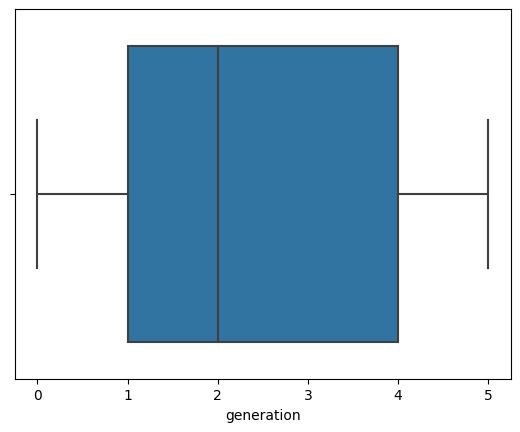

In [22]:
print(df['generation'].median())
sns.boxplot(x=df['generation'])

In [23]:
columns_int = df.select_dtypes(include=["int64", "float64"])

In [24]:
for x in columns_int:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [25]:
df.isnull().sum()

country                 0
year                    0
sex                     0
suicides_no          3909
population           4180
suicides/100k pop    2046
gdp_for_year         3586
gdp_per_capita       1016
generation              0
dtype: int64

In [26]:
df = df.dropna()
df.isnull().sum()

country              0
year                 0
sex                  0
suicides_no          0
population           0
suicides/100k pop    0
gdp_for_year         0
gdp_per_capita       0
generation           0
dtype: int64



---



## Нормализация данных

In [27]:
cdf = df.copy()
buff = cdf["suicides_no"]
cdf = (df - df.min())/(df.max() - df.min())
del cdf["suicides_no"]
cdf.insert(0, "suicides_no", buff)
scaled_df = cdf

In [28]:
scaled_df

,suicides_no,country,year,sex,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,21.0,0.0,0.064516,0.0,0.087605,0.167082,0.003332,0.009632,0.4
1,16.0,0.0,0.064516,0.0,0.086232,0.129233,0.003332,0.009632,1.0
2,14.0,0.0,0.064516,1.0,0.081104,0.120269,0.003332,0.009632,0.4
3,1.0,0.0,0.064516,0.0,0.006031,0.114293,0.003332,0.009632,0.2
4,9.0,0.0,0.064516,0.0,0.076789,0.081673,0.003332,0.009632,0.0
...,...,...,...,...,...,...,...,...,...
27814,162.0,1.0,0.935484,1.0,0.766413,0.147410,0.099535,0.036372,0.8
27816,9.0,1.0,0.935484,1.0,0.097572,0.064243,0.099535,0.036372,1.0
27817,60.0,1.0,0.935484,0.0,0.773956,0.054034,0.099535,0.036372,0.6
27818,44.0,1.0,0.935484,1.0,0.737370,0.041584,0.099535,0.036372,0.6




---



## Тепловые карты

Тепловые карты - это тип графика, который необходим для поиска зависимых переменных. Один из лучших способов найти взаимосвязь между характеристиками: тепловые карты.

<AxesSubplot:>

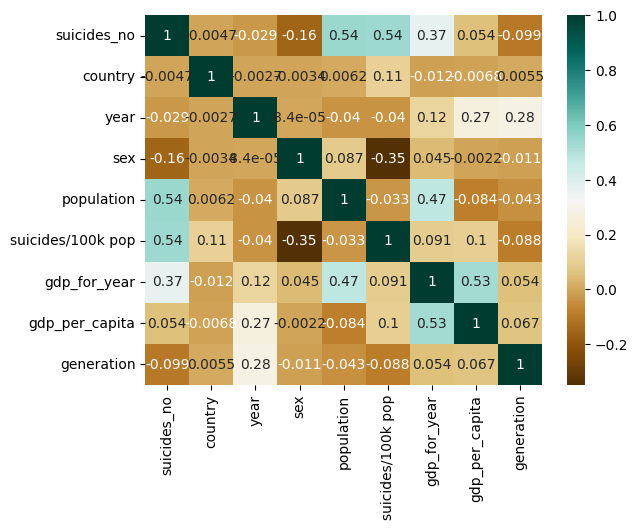

In [29]:
sns.heatmap(scaled_df.corr(),cmap="BrBG",annot=True)

<AxesSubplot:>

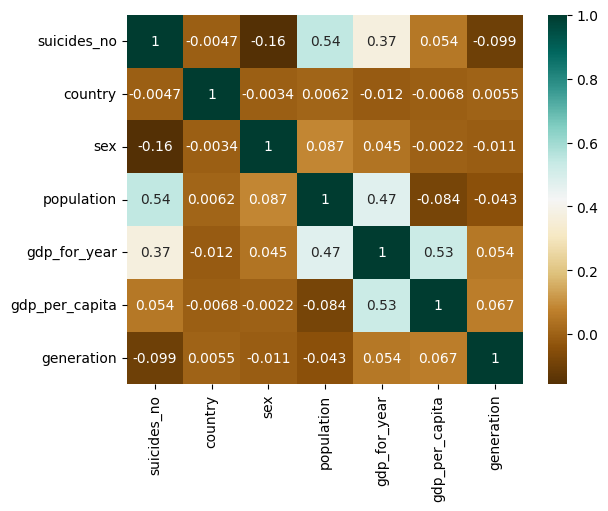

In [30]:
df = df.drop(columns=["year", "suicides/100k pop"])

cdf = df.copy()
buff = cdf["suicides_no"]
cdf = (df - df.min())/(df.max() - df.min())
del cdf["suicides_no"]
cdf.insert(0, "suicides_no", buff)
scaled_df = cdf

sns.heatmap(scaled_df.corr(),cmap="BrBG",annot=True)

In [31]:
scaled_df.describe()

,suicides_no,country,sex,population,gdp_for_year,gdp_per_capita,generation
count,19407.000000,19407.000000,19407.000000,19407.000000,19407.000000,19407.000000,19407.000000
mean,37.760808,0.461369,0.552687,0.142581,0.120108,0.223861,0.543113
std,60.696525,0.288720,0.497229,0.186572,0.187078,0.236180,0.356260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.210000,0.000000,0.014554,0.007191,0.049168,0.200000
50%,9.000000,0.430000,1.000000,0.082477,0.033561,0.127814,0.400000
75%,47.000000,0.700000,1.000000,0.178143,0.152187,0.331890,0.800000
max,323.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




---



## Построение моделей

Установить зависимость между количеством суицидов и страной, полом, населением, ВВП, поколением.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNetCV

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import numpy as np

### Вспомогательные функции

In [33]:
regressors = []

In [ ]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Затрачено времени: %i часов %i минут и %s секунд.' % (thour, tmin, round(tsec, 2)))

In [35]:
def errors(y_test, y_pred):
    print(f"r2_score: {r2_score(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")

In [36]:
def plot_pred_eval(name, xd, yd):
    fig, ax = plt.subplots(figsize=(10,10))
    sns.scatterplot(x = xd, y = yd, alpha = 0.5)
    
    sns.lineplot(x = [0, 325], y = [0, 325], color=sns.husl_palette(10)[0], ax=ax)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title('Prediction evaluation (' + name + ')', size=15)
    plt.show()

### Разбиение на тестовую и обучающую выборки

In [37]:
data_final = scaled_df

In [38]:
X = data_final[['country', 'sex', 'population', 'gdp_per_capita', 'generation']]
y = data_final['suicides_no']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5051)



---



### Линейная регрессия

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
lr_y_pred = lr.predict(X_test)

In [42]:
lr.coef_

array([ -1.7246498 , -25.77853935, 189.23774217,  26.2424395 ,
       -14.22747852])

In [43]:
errors(y_test, lr_y_pred)

r2_score: 0.33288075152098884
MAE: 31.31827357094293
MSE: 2390.612677497922


In [44]:
print("Accuracy on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test, y_test)))

Accuracy on training set: 0.367
Accuracy on test set: 0.333


Чтобы сравнить предсказанные значения с реальными значениями, нанесем их на один и тот же рисунок. Значения должны быть выровнены по линии под углом 45°.

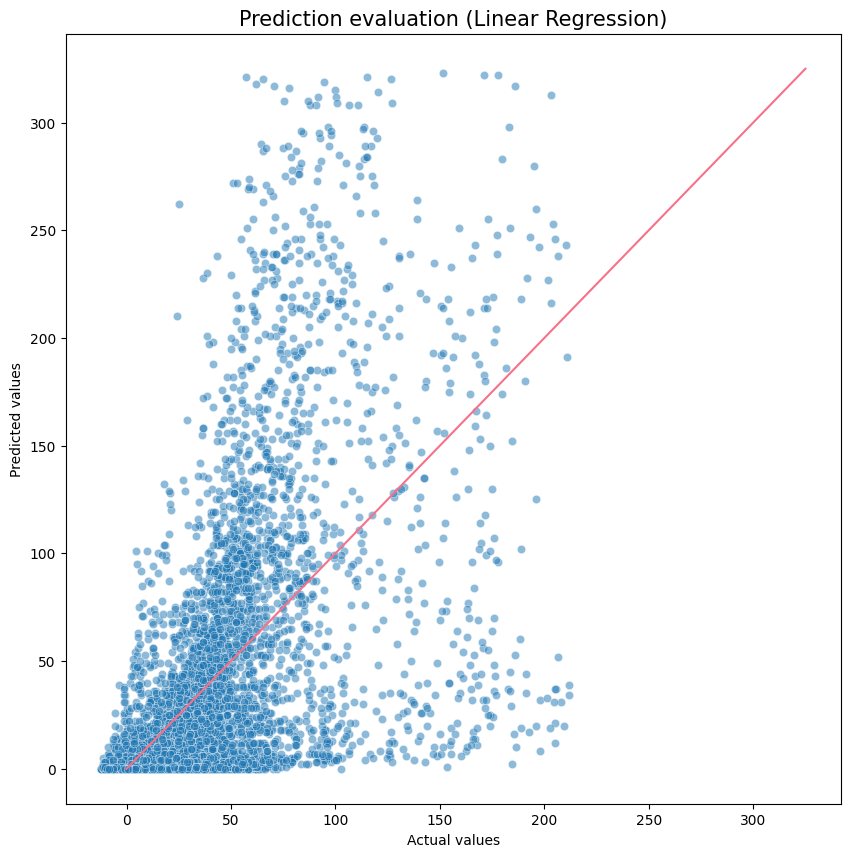

In [45]:
plot_pred_eval("Linear Regression", lr_y_pred, y_test)
regressors.append(("Linear Regression", r2_score(y_test, lr_y_pred)))

Наша модель, плохо справляется со своей задачей.
Это может быть связано с тем, что выбранные нами функции недостаточно хороши, или это может быть связано с тем, что данные, которые у нас есть, нелинейны, поэтому аналогичная модель не будет никакой пользы, чтобы оценить значения.



---



### Lasso (L1 - регуляция)

Штраф — это сумма квадратов коэффициентов переменных.

Highest r2 = 0.3333397395950731 with alpha (lambda) = 0.2


Text(0, 0.5, '$r2 score$')

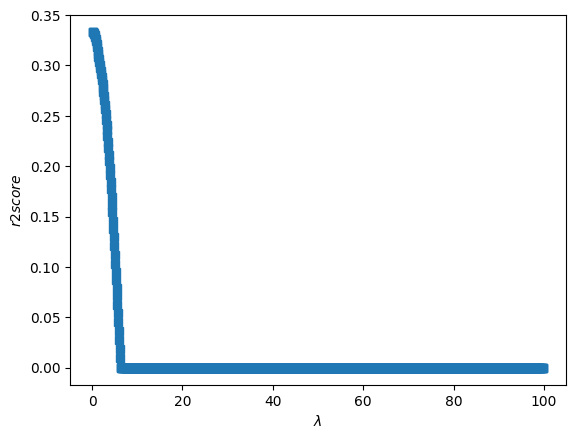

In [46]:
Ys = []
Xs = []
for i in range(1, 1000):
    l_alpha = i*10 / 100
    model = Lasso(alpha = l_alpha)
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    r2 = r2_score(y_test, Y_pred)
    Xs.append(l_alpha)
    Ys.append(r2)

r2_max = np.max(Ys)
r2_max_i = Ys.index(r2_max)
print(f"Highest r2 = {r2_max} with alpha (lambda) = {Xs[r2_max_i]}")

plt.plot(Xs, Ys, marker="s")
plt.xlabel("$λ$")
plt.ylabel("$r2 score$")

In [47]:
l1r = Lasso(alpha = 0.2)
l1r.fit(X_train, y_train)

Lasso(alpha=0.2)

In [48]:
l1r_y_pred = l1r.predict(X_test)

In [49]:
errors(y_test, l1r_y_pred)

r2_score: 0.3333397395950731
MAE: 31.25131328111721
MSE: 2388.967900029384


In [50]:
print("Accuracy on training set: {:.3f}".format(l1r.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(l1r.score(X_test, y_test)))

Accuracy on training set: 0.366
Accuracy on test set: 0.333


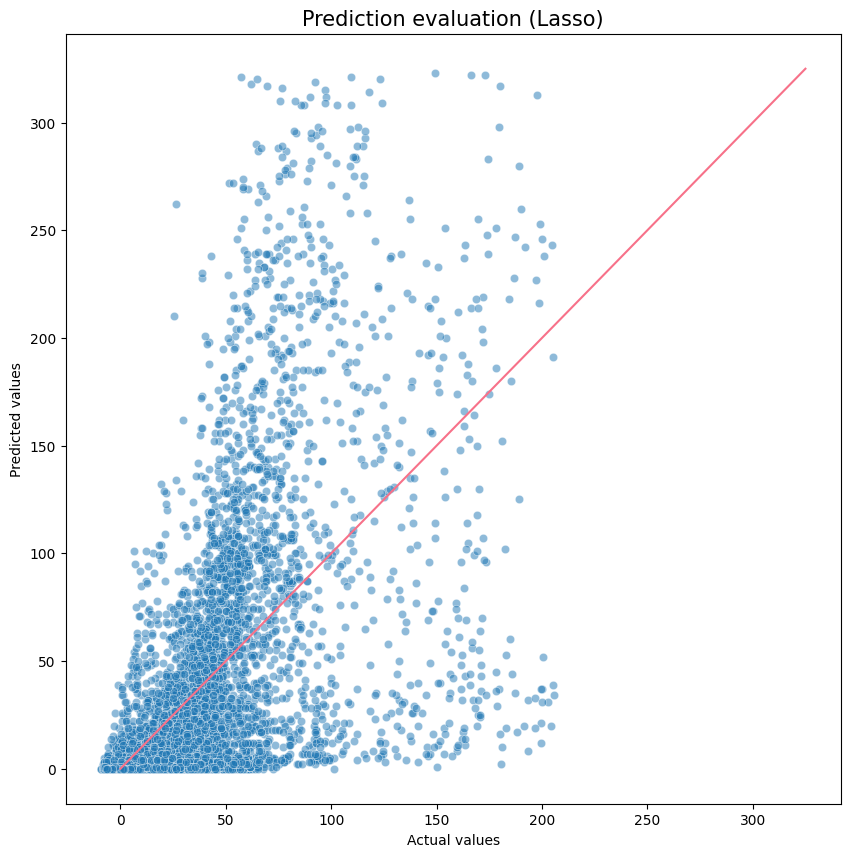

In [51]:
plot_pred_eval("Lasso", l1r_y_pred, y_test)
regressors.append(("Lasso", r2_score(y_test, l1r_y_pred)))



---



### Ridge (L2 - регуляция)

Штраф за признаки с большим значением коэффициентов.

In [52]:
n_alphas = 1000
ridge_alphas = np.logspace(0.1, 200, n_alphas)
l2r = RidgeCV(alphas=ridge_alphas, scoring="neg_mean_squared_error", cv=5)
l2r.fit(X_train, y_train)

RidgeCV(alphas=array([1.25892541e+000, 1.99572225e+000, 3.16373574e+000, 5.01533908e+000,
       7.95060908e+000, 1.26037709e+001, 1.99802354e+001, 3.16738387e+001,
       5.02112231e+001, 7.95977700e+001, 1.26183044e+002, 2.00032748e+002,
       3.17103621e+002, 5.02691222e+002, 7.96895550e+002, 1.26328547e+003,
       2.00263408e+003, 3.17469276e+003, 5.03270880e+003, 7.97814457e+003,
       1.264742...
       1.57796766e+196, 2.50148670e+196, 3.96550314e+196, 6.28634770e+196,
       9.96548635e+196, 1.57978723e+197, 2.50437119e+197, 3.97007580e+197,
       6.29359655e+197, 9.97697764e+197, 1.58160890e+198, 2.50725900e+198,
       3.97465373e+198, 6.30085375e+198, 9.98848219e+198, 1.58343266e+199,
       2.51015015e+199, 3.97923694e+199, 6.30811933e+199, 1.00000000e+200]),
        cv=5, scoring='neg_mean_squared_error')

In [53]:
l2r.coef_

array([ -1.71945334, -25.75141491, 188.69635407,  26.162439  ,
       -14.22603346])

In [54]:
l2r.alpha_

1.2589254117941673

In [55]:
l2r_y_pred = l2r.predict(X_test)

In [56]:
errors(y_test, l2r_y_pred)

r2_score: 0.33300958045516216
MAE: 31.322274664270527
MSE: 2390.151020779179


In [57]:
print("Accuracy on training set: {:.3f}".format(l2r.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(l2r.score(X_test, y_test)))

Accuracy on training set: 0.367
Accuracy on test set: 0.333


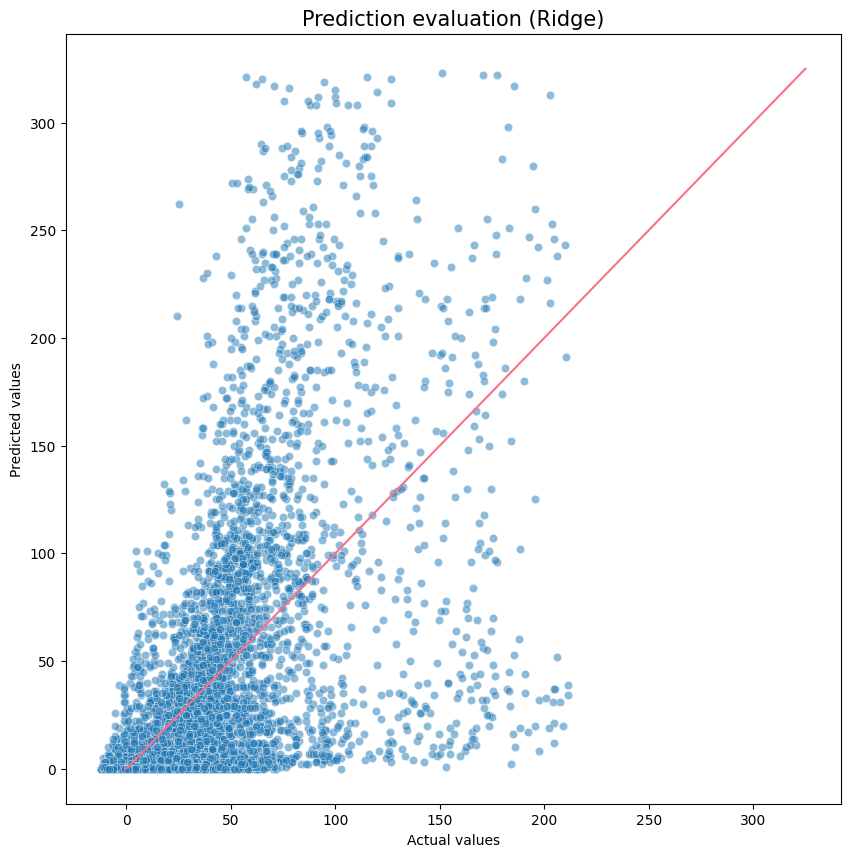

In [58]:
plot_pred_eval("Ridge", l2r_y_pred, y_test)
regressors.append(("Ridge", r2_score(y_test, l2r_y_pred)))



---



### Дерево решений (Decision Tree)

In [59]:
params_rfc = {
    'max_depth' : [5, 10, 50, None],
    'random_state' : [0, 10, 100, 250, None],
    'splitter': ["best", "random"],
}

dt = DecisionTreeRegressor()
random_search = GridSearchCV(estimator=dt, param_grid=params_rfc, cv=2, n_jobs=-1)
start_time = timer(None)
random_search.fit(X_train, y_train.values.ravel())
timer(start_time)
print(random_search.best_params_)
print(random_search.best_score_)
rf_bp_dt = random_search.best_params_


 Затрачено времени: 0 часов 0 минут и 2.17 секунд.
{'max_depth': 10, 'random_state': 100, 'splitter': 'best'}
0.6858357499903807


In [60]:
dt = DecisionTreeRegressor(**rf_bp_dt)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=100)

In [61]:
dt_y_pred = dt.predict(X_test)

In [62]:
errors(y_test, dt_y_pred)

r2_score: 0.7374944628502134
MAE: 15.177249188038218
MSE: 940.6849921576284


In [63]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.851
Accuracy on test set: 0.737


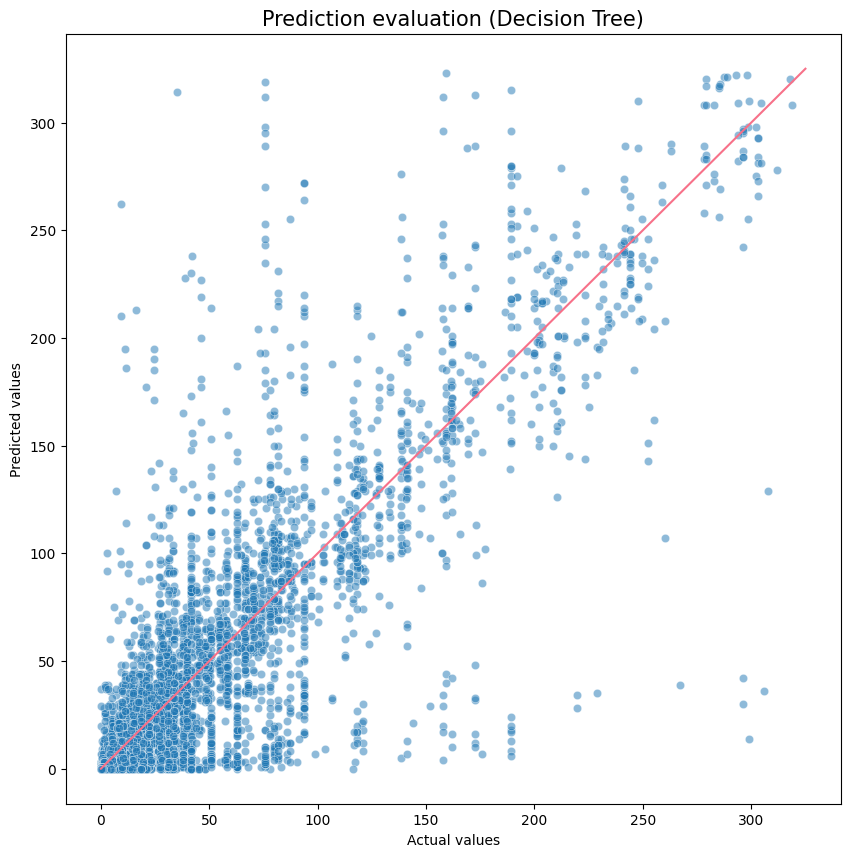

In [64]:
plot_pred_eval("Decision Tree", dt_y_pred, y_test)
regressors.append(("Decision Tree", r2_score(y_test, dt_y_pred)))

Прогнозы намного лучше, чем те, которые дает линейная регрессия. Тем не менее, дерево решений нуждается в дальнейшей настройке для получения лучших результатов. Наши данные также могут нуждаться в большем преобразовании или нам может потребоваться больше функций для получения более точных результатов.



---



### XGBoost

In [65]:
xgb = XGBRegressor(n_estimators = 1000, max_depth=5, eval_metric = "rmse")
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [66]:
xgb_y_pred = xgb.predict(X_test)

In [67]:
errors(y_test, xgb_y_pred)

r2_score: 0.8500482923746869
MAE: 12.480194481161679
MSE: 537.3498877132364


In [68]:
print("Accuracy on training set: {:.3f}".format(xgb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xgb.score(X_test, y_test)))

Accuracy on training set: 0.994
Accuracy on test set: 0.850


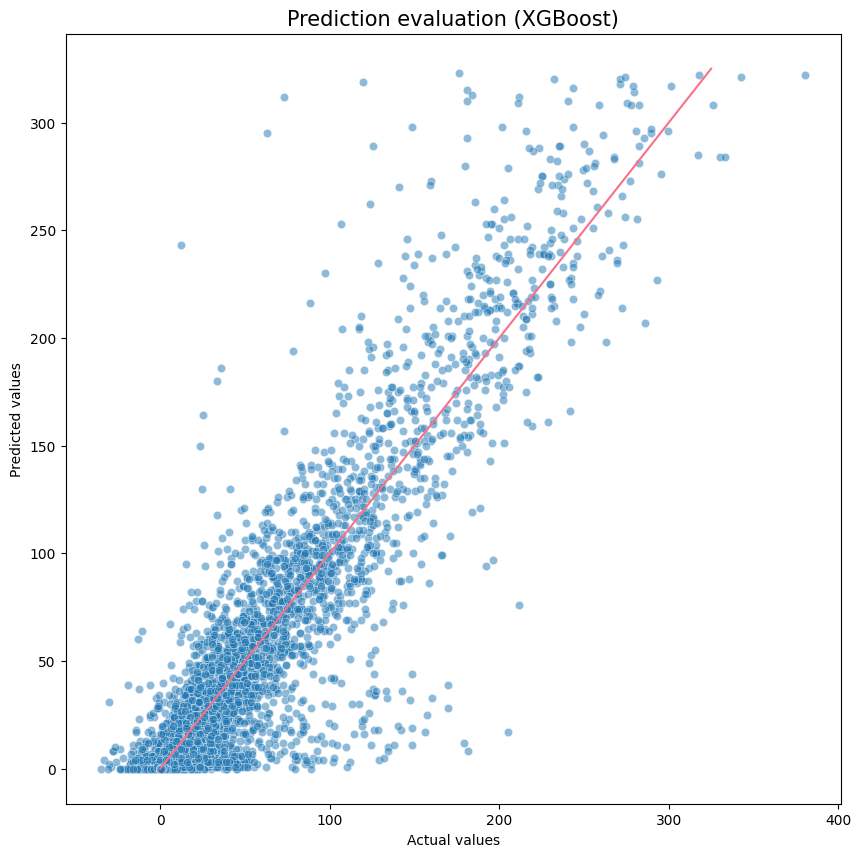

In [69]:
plot_pred_eval("XGBoost", xgb_y_pred, y_test)
regressors.append(("XGBoost", r2_score(y_test, xgb_y_pred)))



---



### ElasticNet (L1 и L2 регуляция)

Штраф учитывающий и L1, и L2

In [70]:
elastic_alphas = np.logspace(0.1, 200, n_alphas)
elastic = ElasticNetCV(alphas=elastic_alphas, cv = 5, random_state = 5051)
elastic.fit(X_train,y_train)

ElasticNetCV(alphas=array([1.25892541e+000, 1.99572225e+000, 3.16373574e+000, 5.01533908e+000,
       7.95060908e+000, 1.26037709e+001, 1.99802354e+001, 3.16738387e+001,
       5.02112231e+001, 7.95977700e+001, 1.26183044e+002, 2.00032748e+002,
       3.17103621e+002, 5.02691222e+002, 7.96895550e+002, 1.26328547e+003,
       2.00263408e+003, 3.17469276e+003, 5.03270880e+003, 7.97814457e+003,
       1.2...
       2.49860553e+195, 3.96093575e+195, 6.27910720e+195, 9.95400829e+195,
       1.57796766e+196, 2.50148670e+196, 3.96550314e+196, 6.28634770e+196,
       9.96548635e+196, 1.57978723e+197, 2.50437119e+197, 3.97007580e+197,
       6.29359655e+197, 9.97697764e+197, 1.58160890e+198, 2.50725900e+198,
       3.97465373e+198, 6.30085375e+198, 9.98848219e+198, 1.58343266e+199,
       2.51015015e+199, 3.97923694e+199, 6.30811933e+199, 1.00000000e+200]),
             cv=5, random_state=5051)

In [71]:
elastic_y_pred = elastic.predict(X_test)

In [72]:
errors(y_test, elastic_y_pred)

r2_score: 0.0402663878055588
MAE: 41.72198504249834
MSE: 3439.192236716117


In [73]:
print("Accuracy on training set: {:.3f}".format(elastic.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(elastic.score(X_test, y_test)))

Accuracy on training set: 0.042
Accuracy on test set: 0.040


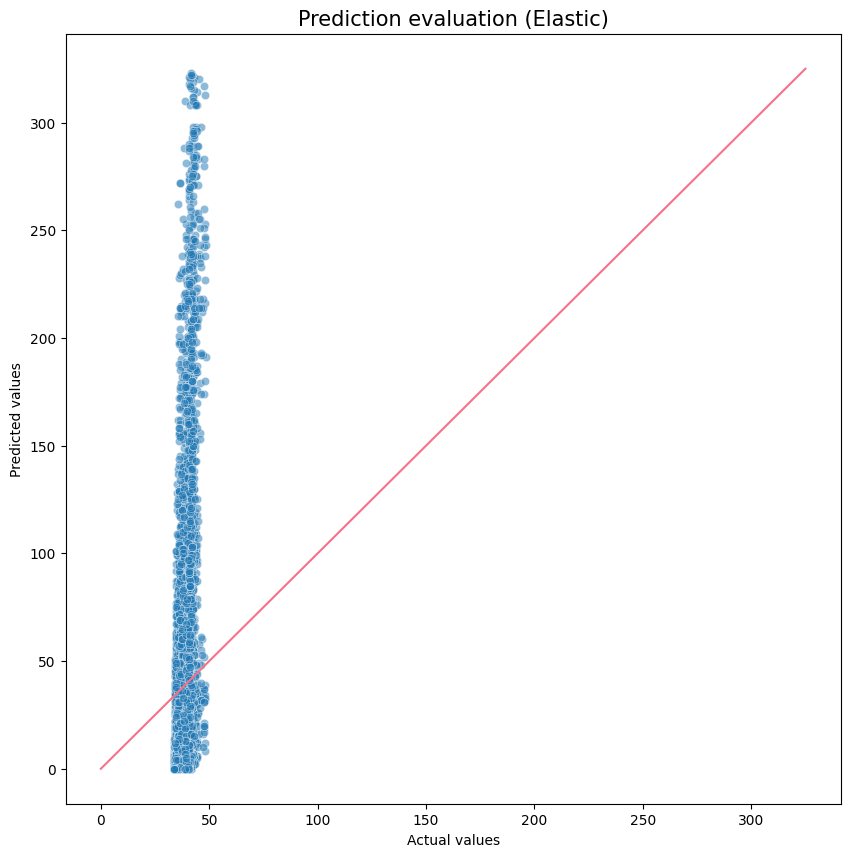

In [74]:
plot_pred_eval("Elastic", elastic_y_pred, y_test)
regressors.append(("Elastic", r2_score(y_test, elastic_y_pred)))



---



### Сравнение

Linear Regression: 33%
Lasso: 33%
Ridge: 33%
Decision Tree: 74%
XGBoost: 85%
Elastic: 4%


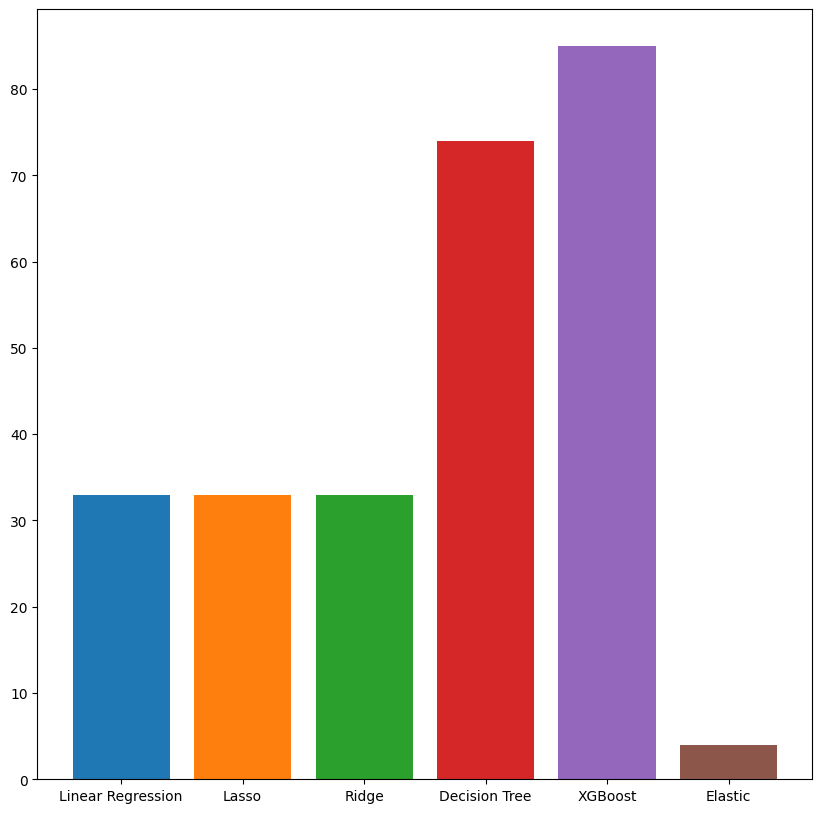

In [75]:
for regressor_name, regressor_r2_score in regressors:
    accuracy = round(regressor_r2_score*100)
    print(f"{regressor_name}: {accuracy}%")
    plt.rcParams["figure.figsize"] = (10,10)
    plt.bar(regressor_name, accuracy)